# Boxplots the mean features of Cough

Here I am going visualize all the Spectral and Temporal feature that I have extracted from raw audio. As I have taken a total of 11 statistics from each of the features, it will be a lot of visualizing. So here I am only ploting the mean features.

Importing dependencies and some helping function that i have created earlier.

In [ ]:
import os
import preprocessing # helping dependency
import vggish_processing # helping dependency
import mfcc_stat # helping dependency
from tqdm import tqdm
import pandas as pd
import numpy as np
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

Extracting Data from raw audio input using librosa

In [2]:
root = "C:/Users/deepd/Documents/Covid/Extracted_trial/"
dirs = os.listdir(root)
data = preprocessing.Get_Data(dirs,root)
cough_heavy = data.get_cough_heavy()

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:52<00:00,  4.32it/s]


In this data I have mapped the covid label to 1 and non-covid label 0. Now, We need to replace this with actual label and also removing the missing value.

In [3]:
new_dict = {0:'Non-Covid',1:'Covid'}
cough_heavy['label'].replace(new_dict,inplace=True)
cough_heavy.dropna(inplace=True)

## Extracting Features and Creating Visualizations

In [7]:
Extracted_feature = preprocessing.Extract_Data(cough_heavy)
mfcc = Extracted_feature.get_mfcc()
mfccdelta = Extracted_feature.get_deltamfcc()
mfcc2delta = Extracted_feature.get_delta2mfcc()

In [8]:
mfcc_feature = mfcc_stat.mfcc_stat(mfcc)
mfcc_mean = mfcc_feature.mean()
df_mfcc_mean = pd.DataFrame(mfcc_mean,columns=range(0,13))

### Boxplot of MFCC

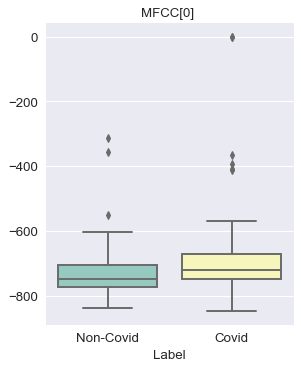

In [17]:
plt.figure(num=None, figsize=(4,5), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=df_mfcc_mean[0],x=cough_heavy['label'],palette='Set3')
plt.xlabel('Label',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("")
plt.title('MFCC[0] ')
plt.show()

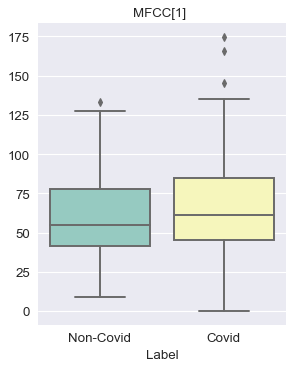

In [15]:
plt.figure(num=None, figsize=(4,5), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=df_mfcc_mean[1],x=cough_heavy['label'],palette='Set3')
plt.xlabel('Label',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("")
plt.title('MFCC[1] ')
plt.show()

### Boxplot of $\Delta$MFCC

In [16]:
mfccdelta_feature = mfcc_stat.mfcc_stat(mfccdelta)
mfccdelta_mean = mfccdelta_feature.mean()
df_mfccdelta_mean = pd.DataFrame(mfccdelta_mean,columns=range(13))

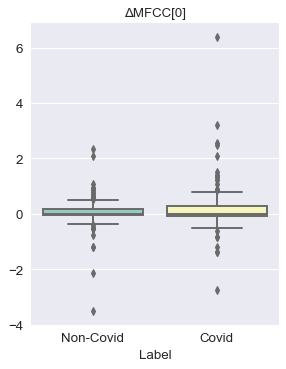

In [27]:
plt.figure(num=None, figsize=(4,5), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=df_mfccdelta_mean[0],x=cough_heavy['label'],palette='Set3')
plt.xlabel('Label',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("")
plt.title('\u0394MFCC[0]')
plt.show()

### Boxplot of $\Delta^2$MFCC

In [25]:
mfccdelta2_feature = mfcc_stat.mfcc_stat(mfcc2delta)
mfccdelta2_mean = mfccdelta2_feature.mean()
df_mfccdelta2_mean = pd.DataFrame(mfccdelta2_mean,columns=range(13))

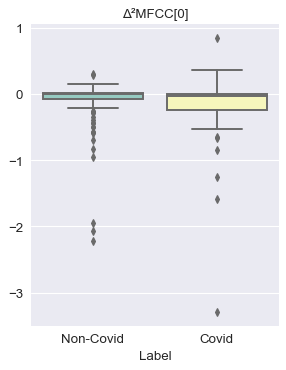

In [26]:
plt.figure(num=None, figsize=(4,5), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=df_mfccdelta2_mean[0],x=cough_heavy['label'],palette='Set3')
plt.xlabel('Label',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("")
plt.title('\u0394\u00b2MFCC[0]')
plt.show()

Now extracting some specrtal features which is based on stft

In [34]:
cough_heavy['spectral_centroid'] = preprocessing.Extract_Data.get_spectral_centroid(cough_heavy)
cough_heavy['roll_off'] = preprocessing.Extract_Data.roll_off(cough_heavy)
cough_heavy['zero_crossing_rate'] = preprocessing.Extract_Data.get_zero_crossing(cough_heavy)
cough_heavy['rms'] = preprocessing.Extract_Data.get_zero_crossing(cough_heavy)

In [35]:
preprocessing.postprocess(cough_heavy,labels=['spectral_centroid','roll_off','zero_crossing_rate','rms'])

In [44]:
cough_heavy['onset'] = preprocessing.Extract_Data.onset(cough_heavy)

### Boxplot of Onset

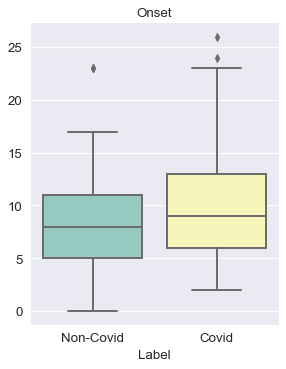

In [47]:
plt.figure(num=None, figsize=(4,5), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=cough_heavy['onset'],x=cough_heavy['label'],palette='Set3')
plt.xlabel('Label',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("")
plt.title('Onset')
plt.show()

### Boxplot of Spectral Centroid

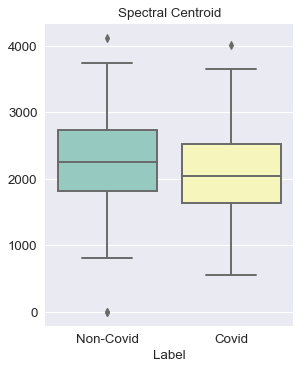

In [37]:
plt.figure(num=None, figsize=(4,5), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=cough_heavy['spectral_centroid_mean'],x=cough_heavy['label'],palette='Set3')
plt.xlabel('Label',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("")
plt.title('Spectral Centroid')
plt.show()

### Boxplot of Roll-off frequency

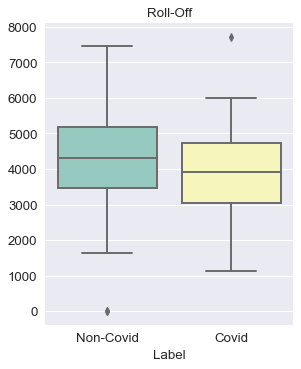

In [40]:
plt.figure(num=None, figsize=(4,5), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=cough_heavy['roll_off_mean'],x=cough_heavy['label'],palette='Set3')
plt.xlabel('Label',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("")
plt.title('Roll-Off')
plt.show()

### Boxplot of Zero-Crossing Rate

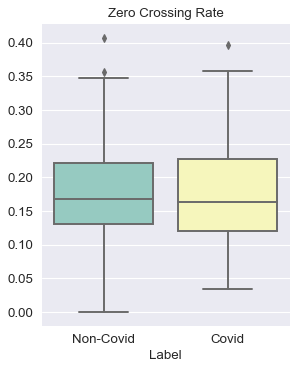

In [39]:
plt.figure(num=None, figsize=(4,5), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=cough_heavy['zero_crossing_rate_mean'],x=cough_heavy['label'],palette='Set3')
plt.xlabel('Label',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("")
plt.title('Zero Crossing Rate')
plt.show()

### Boxplot of RMS Energy

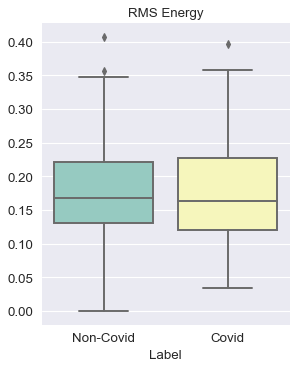

In [41]:
plt.figure(num=None, figsize=(4,5), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y=cough_heavy['rms_mean'],x=cough_heavy['label'],palette='Set3')
plt.xlabel('Label',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("")
plt.title('RMS Energy')
plt.show()